In [43]:
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib.ticker import MaxNLocator

In [44]:
data_recon_d_eager = pd.read_csv('../logs/parser_ReconDEager.csv')
data_recon_d_generous = pd.read_csv('../logs/parser_ReconDGenerous.csv')
data_recon_d_helpful = pd.read_csv('../logs/parser_ReconDHelpful.csv')
data_recon_d_selfish = pd.read_csv('../logs/parser_ReconDSelfish.csv')
data_recon_d_selfish_alpha = pd.read_csv('../logs/parser_ReconDSelfish_alpha.csv')

In [45]:
report_headers = ['Scenario', 'Alpha', 'Beta', 'Gamma', 'Turn', 'Drones', 'Intel', 'Adv', 'Score']
groupby_headers = report_headers[:5]

In [46]:
data_recon_d_eager = data_recon_d_eager[report_headers].groupby(groupby_headers).mean().reset_index()
data_recon_d_generous = data_recon_d_generous[report_headers].groupby(groupby_headers).mean().reset_index()
data_recon_d_helpful = data_recon_d_helpful[report_headers].groupby(groupby_headers).mean().reset_index()
data_recon_d_selfish = data_recon_d_selfish[report_headers].groupby(groupby_headers).mean().reset_index()
data_recon_d_selfish_alpha = data_recon_d_selfish_alpha[report_headers].groupby(groupby_headers).mean().reset_index()

In [47]:
data_recon_d_eager["Utility"] = (data_recon_d_eager["Intel"]/65 * .30) + (data_recon_d_eager["Adv"]/300 * .15) + (data_recon_d_eager["Drones"]/200 * .25) + (data_recon_d_eager["Score"] * .15)
data_recon_d_generous["Utility"] = (data_recon_d_generous["Intel"]/65 * .30) + (data_recon_d_generous["Adv"]/300 * .15) + (data_recon_d_generous["Drones"]/200 * .25) + (data_recon_d_generous["Score"] * .15)
data_recon_d_helpful["Utility"] = (data_recon_d_helpful["Intel"]/65 * .30) + (data_recon_d_helpful["Adv"]/300 * .15) + (data_recon_d_helpful["Drones"]/200 * .25) + (data_recon_d_helpful["Score"] * .15)
data_recon_d_selfish["Utility"] = (data_recon_d_selfish["Intel"]/65 * .30) + (data_recon_d_selfish["Adv"]/300 * .15) + (data_recon_d_selfish["Drones"]/200 * .25) + (data_recon_d_selfish["Score"] * .15)
data_recon_d_selfish_alpha["Utility"] = (report_recon_d_selfish_alpha["Intel"]/65 * .30) + (report_recon_d_selfish_alpha["Adv"]/300 * .15)

In [28]:
report_recon_d_selfish_alpha[report_recon_d_selfish_alpha["Turn"] == 3600][["Alpha", "Drones", "Utility"]]

,Alpha,Drones,Utility
360,0.000,78.416667,0.264554
721,0.125,82.250000,0.261651
1082,0.250,81.333333,0.261455
1443,0.375,75.166667,0.262942
1804,0.500,70.250000,0.267798
2165,0.625,67.166667,0.267798
2526,0.750,64.666667,0.272029
2887,0.875,66.166667,0.276481
3248,1.000,63.666667,0.274744


In [66]:
data_recon_d_eager["Utility"]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
356    0.460468
357    0.460468
358    0.467593
359    0.499593
360    0.509405
Name: Utility, Length: 361, dtype: float64

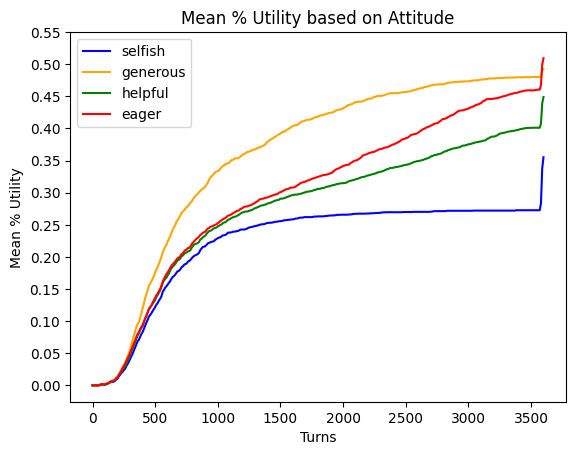

In [51]:
x_labels = ['selfish', 'generous', 'helpful', 'eager']
x_colors = ['blue', 'orange', 'green', 'red']

plt.plot(data_recon_d_selfish["Turn"], data_recon_d_selfish["Utility"], label=x_labels[0], color=x_colors[0])
plt.plot(data_recon_d_generous["Turn"], data_recon_d_generous["Utility"], label=x_labels[1], color=x_colors[1])
plt.plot(data_recon_d_helpful["Turn"], data_recon_d_helpful["Utility"], label=x_labels[2], color=x_colors[2])
plt.plot(data_recon_d_eager["Turn"], data_recon_d_eager["Utility"], label=x_labels[3], color=x_colors[3])

plt.title(f'Mean % Utility based on Attitude')
plt.xlabel('Turns')
plt.ylabel('Mean % Utility')
plt.yticks(np.arange(0, 0.60, step=0.05))
plt.legend()

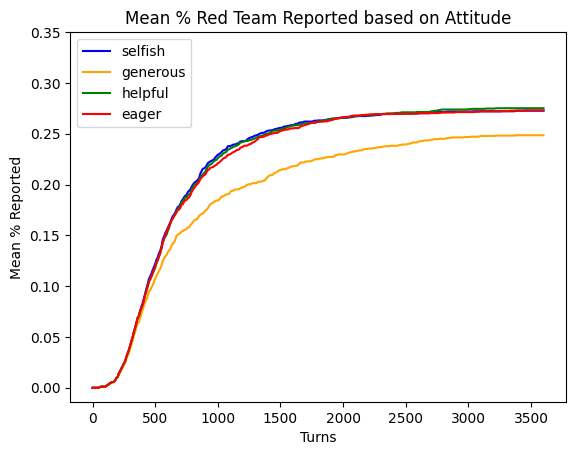

In [58]:
x_labels = ['selfish', 'generous', 'helpful', 'eager']
x_colors = ['blue', 'orange', 'green', 'red']

plt.plot(data_recon_d_selfish["Turn"], (data_recon_d_selfish["Intel"]/65 * .30) + (data_recon_d_selfish["Adv"]/300 * .15), label=x_labels[0], color=x_colors[0])
plt.plot(data_recon_d_generous["Turn"], (data_recon_d_generous["Intel"]/65 * .30) + (data_recon_d_generous["Adv"]/300 * .15), label=x_labels[1], color=x_colors[1])
plt.plot(data_recon_d_helpful["Turn"], (data_recon_d_helpful["Intel"]/65 * .30) + (data_recon_d_helpful["Adv"]/300 * .15), label=x_labels[2], color=x_colors[2])
plt.plot(data_recon_d_eager["Turn"], (data_recon_d_eager["Intel"]/65 * .30) + (data_recon_d_eager["Adv"]/300 * .15), label=x_labels[3], color=x_colors[3])

plt.title(f'Mean % Red Team Reported based on Attitude')
plt.xlabel('Turns')
plt.ylabel('Mean % Reported')
plt.yticks(np.arange(0, 0.40, step=0.05))
plt.legend()

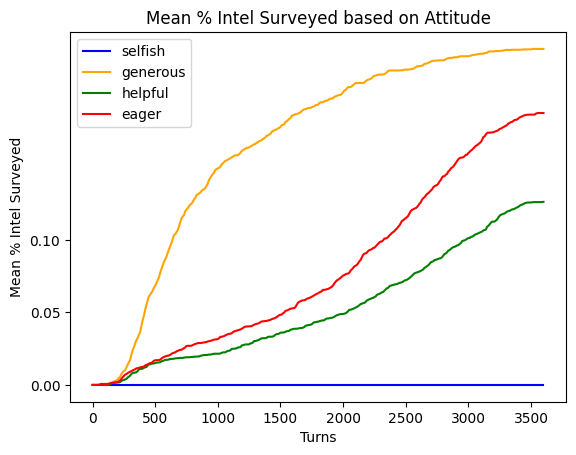

In [59]:
x_labels = ['selfish', 'generous', 'helpful', 'eager']
x_colors = ['blue', 'orange', 'green', 'red']

plt.plot(data_recon_d_selfish["Turn"], (data_recon_d_selfish["Score"] * .15), label=x_labels[0], color=x_colors[0])
plt.plot(data_recon_d_generous["Turn"], (data_recon_d_generous["Score"] * .15), label=x_labels[1], color=x_colors[1])
plt.plot(data_recon_d_helpful["Turn"], (data_recon_d_helpful["Score"] * .15), label=x_labels[2], color=x_colors[2])
plt.plot(data_recon_d_eager["Turn"], (data_recon_d_eager["Score"] * .15), label=x_labels[3], color=x_colors[3])

plt.title(f'Mean % Intel Surveyed based on Attitude')
plt.xlabel('Turns')
plt.ylabel('Mean % Intel Surveyed')
plt.yticks(np.arange(0, 0.15, step=0.05))
plt.legend()

In [62]:
data_recon_d_selfish[data_recon_d_selfish["Turn"] == 3600]["Drones"]/200 *.25

360    0.0825
Name: Drones, dtype: float64

In [63]:
data_recon_d_generous[data_recon_d_generous["Turn"] == 3600]["Drones"]/200 *.25

360    0.012
Name: Drones, dtype: float64

In [64]:
data_recon_d_helpful[data_recon_d_helpful["Turn"] == 3600]["Drones"]/200 *.25

360    0.047562
Name: Drones, dtype: float64

In [65]:
data_recon_d_eager[data_recon_d_eager["Turn"] == 3600]["Drones"]/200 *.25

360    0.048937
Name: Drones, dtype: float64